In [1]:
import numpy as np
import os
np.random.seed(42)

# **MNIST**

In [2]:
# try:
#     # Thực hiện các câu lệnh có thể xảy ra ngoại lệ
# except ExceptionType:
#     # Xử lý ngoại lệ

In [3]:
# Cấu trúc comprehensions trong python
# output_list = [output_exp for var in input_list if (var satisfies this condition)]

In [4]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [13]:
from sklearn.datasets import fetch_openml
# hàm fetch_openml dùng để tải bộ dữ liệu mnins
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
# mnist_784 tên dữ liệu trong OpenMl, version của dữ liệu
# cache có lưu dữ liệu vào bộ nhớ đệm hay không
# as_frame có lưu dữ liệu dưới dạng pandas hay không
mnist.target = mnist.target.astype(np.int8)
# Trả lại target tức labels cuaer mnist dưới dạng số nguyên
sort_by_target(mnist)
# # Sắp xếp lại thứ tự dữ liệu

In [12]:
# #Example for enumerate
# my_list = ['apple', 'banana', 'orange']
# for item in enumerate(my_list, start=3):
#     print(item)

(3, 'apple')
(4, 'banana')
(5, 'orange')


In [98]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape
# 784 = 28*28

((70000, 784), (70000,))

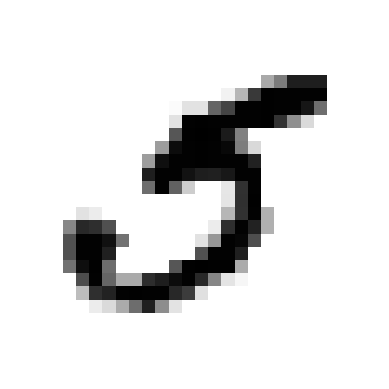

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

some_digit = X[36000]
some_digit_image  = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
# interpolation: phương pháp nội xuy để hiện hình ảnh
plt.axis('off')
plt.show()

In [100]:
def plot_digits(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
              interpolation='nearest')
    plt.axis('off')

In [101]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

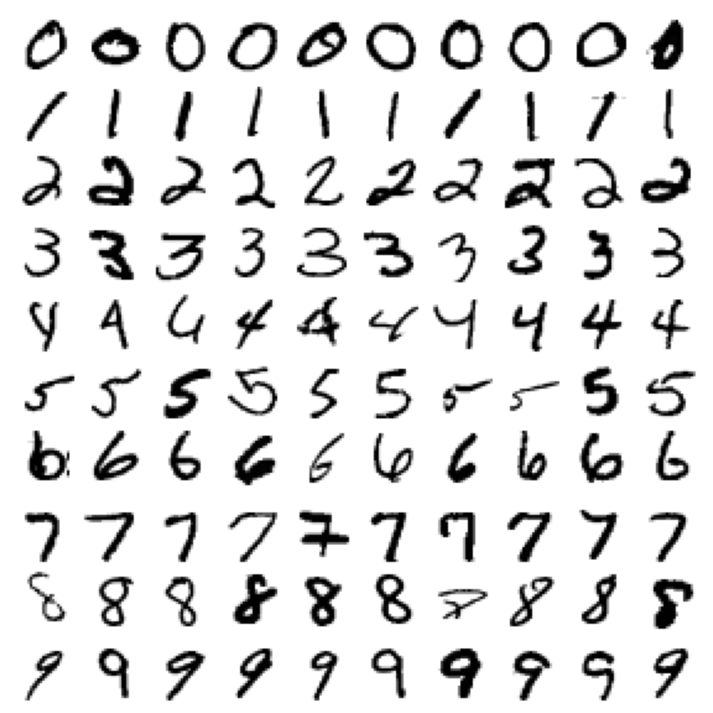

In [102]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [103]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [107]:
y_test

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [105]:
shuffle_index  = np.random.permutation(60000)
# permutation dùng để hoán vị ngẫu nhiên một dãy
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binarry Classifier

In [110]:
y_train_5 = ( y_train == 5)
y_test_5 = ( y_test == 5)

In [111]:
y_train_5, y_test_5

(array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]))

In [ ]:
from sklearn.linear_model import 

In [112]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=None,random_state=42)
# max_iter: số lần lặp lặp lại tối đa của thuật toán, trường hợp ko hội tụ thì nên đưa này vào
# tol: Tiêu chí dừng cho quá trình huấn luyện.
# Trong trường hợp này, giá trị là -np.infty,
# có nghĩa là quá trình huấn luyện sẽ tiếp tục cho đến khi đạt được số lần 
# lặp tối đa
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=None)

In [113]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measure

### Measuring Accuracy Using Cross-Validation

In [120]:
from sklearn.model_selection import StratifiedKFold
# Trình xác thực chéo KFold phân tầng
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.9686
0.96205
0.9668


In [121]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
from sklearn.model_selection import cross_val_score
# Chia mẫu có phân tầng

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96225, 0.9645 , 0.94765])

In [123]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [124]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.909  , 0.90715, 0.9128 ])

### Confusion Matrix

In [125]:
from sklearn.model_selection import cross_val_predict
# Chia mẫu có phân tầng
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# Trả về y đã predict

In [131]:
sum(y_train_pred == y_train_5)/len(y_train_pred)

0.9581333333333333

In [127]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53417,  1162],
       [ 1350,  4071]], dtype=int64)

In [128]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall

In [132]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7779476399770686

In [133]:
recall_score(y_train_5, y_train_pred)

0.7509684560044272

In [134]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7642200112633752

### Precision/Recall Tradeoff

In [135]:
y_scores = sgd_clf.decision_function([some_digit]) #decision_function = np.dot(X, coef_.T) + intercept_
# scores > 0 then y belong to positve class else y belong to negative class
y_scores

array([150526.40944343])

In [136]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [137]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [138]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')

In [140]:
y_scores.shape

(60000,)

In [38]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [141]:
y_scores.shape

(60000,)

In [143]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [144]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1],'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0, 1])
    plt.xlim([-800000, 800000])

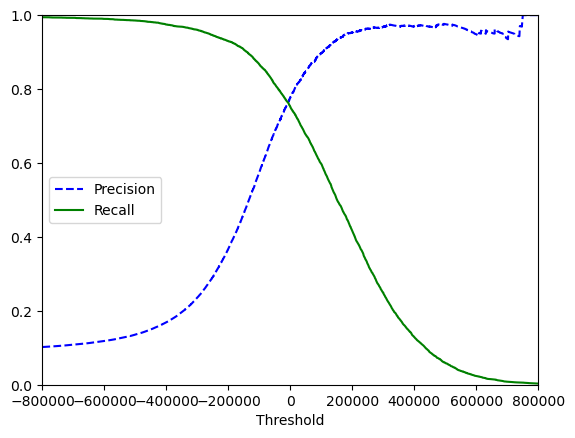

In [145]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [146]:
(y_scores > 400000)

array([False, False, False, ..., False, False, False])

In [147]:
y_train_pred_90 = (y_scores > 400000)

In [148]:
precision_score(y_train_5, y_train_pred_90)

0.9707520891364902

In [149]:
recall_score(y_train_5, y_train_pred_90)

0.1285740638258624

In [150]:
(y_train_pred == (y_scores > 0)).all()

True

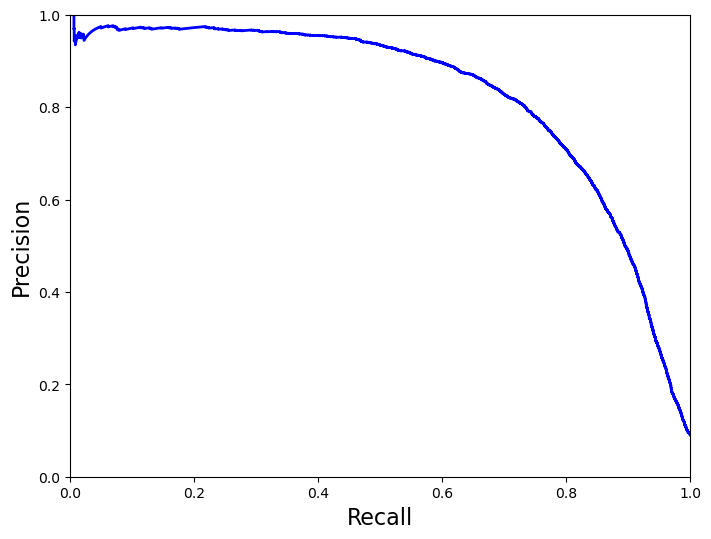

In [151]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [152]:
y_train_5

array([False, False, False, ..., False, False, False])

### ROC curves

In [153]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [154]:
def plot_roc_curve(fpr, tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Random ROC')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.xlabel('True Possitive Rate')
    plt.legend()

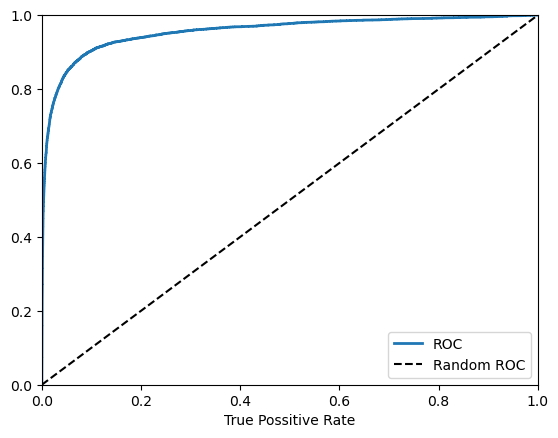

In [155]:
plot_roc_curve(fpr, tpr, 'ROC')

In [156]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9562435587387078

In [157]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [158]:
y_probas_forest

array([[1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ]])

In [159]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.  , 0.02, 0.  , ..., 0.01, 0.02, 0.  ])

In [160]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

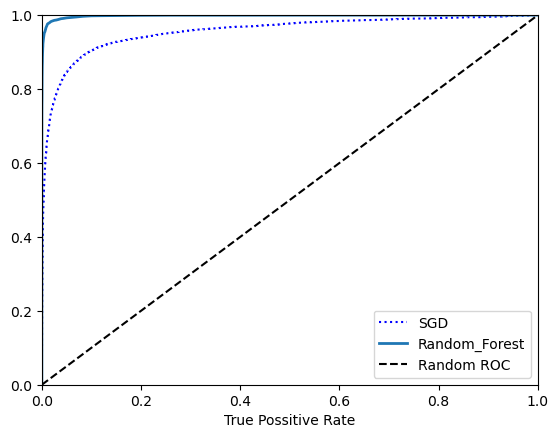

In [161]:
plt.plot(fpr, tpr, 'pb:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest,'Random_Forest')
plt.legend(loc='lower right')
plt.show()

In [162]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983730844244434

In [163]:
from sklearn.ensemble import RandomForestClassifier
y_train_forest_pred = cross_val_predict(forest_clf, X_train,
                                        y_train_5, cv=3)

In [164]:
precision_score(y_train_5,y_train_forest_pred)

0.9888748950461796

In [165]:
recall_score(y_train_5, y_train_forest_pred)

0.8690278546393654

### Mutilclass Classification

In [166]:
sgd_clf.fit(X_train, y_train) # Tự động chạy OvsA
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [167]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-152619.46799791, -441052.22074349, -249930.3138537 ,
        -237258.35168498, -447251.81933158,  120565.05820991,
        -834139.15404835, -188142.48490477, -555223.79499145,
        -536978.92518594]])

In [168]:
np.argmax(some_digit_scores)

5

In [169]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [170]:
sgd_clf.classes_[5]

5

In [171]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [172]:
len(ovo_clf.estimators_) #Trả về số lượng bộ phân loại

45

In [173]:
forest_clf.fit(X_train, y_train )

RandomForestClassifier(random_state=42)

In [174]:
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [175]:
len(forest_clf.estimators_) # Đếm số lượng bộ phân loại nhị phân

100

In [176]:
forest_clf.predict_proba([some_digit])

array([[0.06, 0.  , 0.01, 0.07, 0.  , 0.86, 0.  , 0.  , 0.  , 0.  ]])

In [177]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.8618, 0.8675, 0.8389])

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [179]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.9091 , 0.90955, 0.9062 ])

### Errors Analysic

In [77]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [78]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5728,    3,   18,   10,   11,   48,   54,   10,   38,    3],
       [   2, 6472,   43,   27,    6,   41,    6,    9,  124,   12],
       [  59,   39, 5300,  103,   96,   24,   99,   57,  167,   14],
       [  60,   42,  133, 5357,    4,  213,   35,   52,  135,  100],
       [  14,   28,   33,    9, 5366,    8,   56,   33,   88,  207],
       [  68,   49,   30,  197,   76, 4566,  118,   33,  190,   94],
       [  35,   28,   31,    1,   47,   86, 5639,    9,   42,    0],
       [  22,   20,   70,   29,   65,   11,    6, 5789,   18,  235],
       [  55,  158,   63,  157,   11,  155,   61,   24, 5022,  145],
       [  38,   37,   30,   85,  185,   24,    2,  216,   74, 5258]],
      dtype=int64)

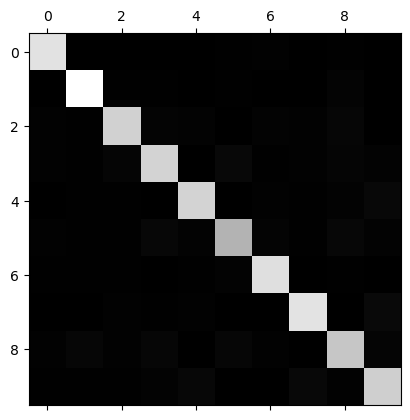

In [79]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [80]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
# Tính tổng tất cả các hàng của ma trận và vẫn giữ kích thước ma trận
norm_conf_mx = conf_mx / row_sums

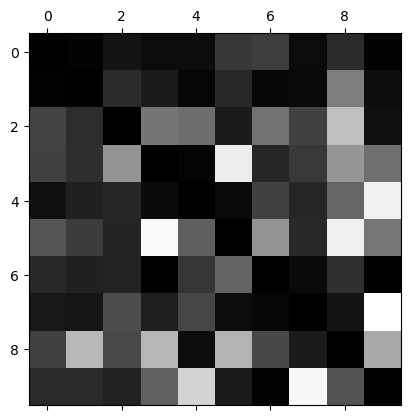

In [81]:
np.fill_diagonal(norm_conf_mx, 0)
# Điền tất cả các giá trị đường chéo chính trên ma trận là số 0
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

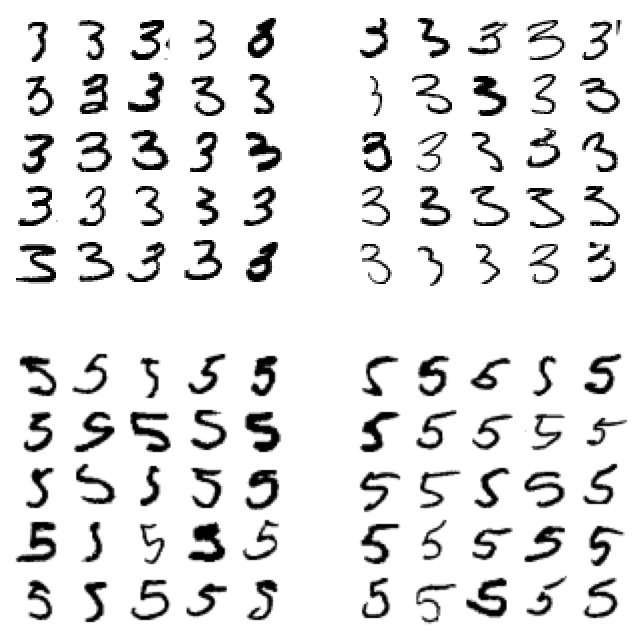

In [82]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Multilabel Classification

In [83]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]
# lệnh np.c_ xếp các mảng theo chiều dọc

In [84]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [85]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [86]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,
                                    cv=3)

f1_score(y_multilabel, y_train_knn_pred, average='macro')
# Tính F1_scores của từng nhãn rồi lấy giá trị trung bình

0.97709078477525

### Multioutput Classification

In [87]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

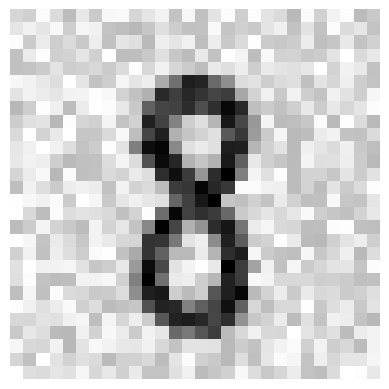

In [88]:
plot_digits([X_train_mod[5]])

In [89]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

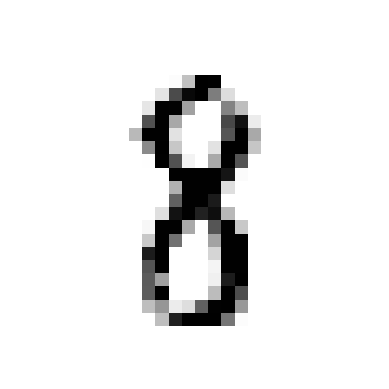

In [90]:
clean_digit = knn_clf.predict([X_train_mod[5]])
plot_digits(clean_digit)

### Excersise

# 2

In [199]:
import cv2
def translation(image, x_trans, y_trans):
    image = image.reshape(28, 28)
    # Lấy kích thước của ảnh
    height, width = (image.shape[0], image.shape[1])
    
    
    # Tạo ma trận dịch chuyển ảnh (chỉ dịch chuyển đơn thuần theo trục x và y)
    trans_matrix = np.float32([[1, 0, x_trans], [0, 1, y_trans]])
    
    # Dịch chuyển ảnh sử dụng warpAffine
    translated_image = cv2.warpAffine(image, trans_matrix, (width, height))
    
    plt.imshow(translated_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")

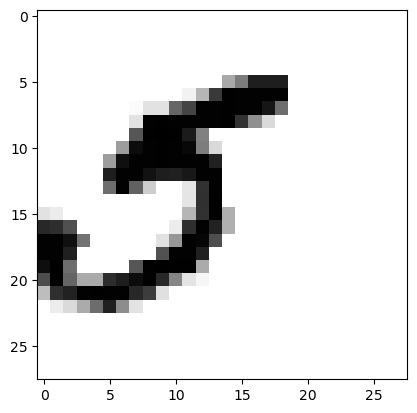

In [201]:
translation(X[36000],0, 0)
translation(X[36000],-5, 0)

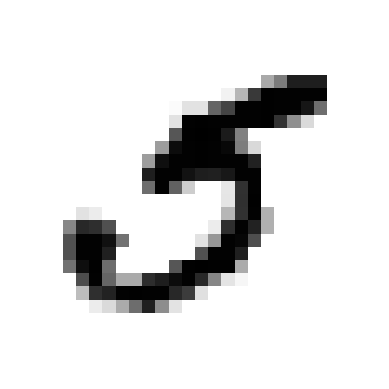

In [189]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()